<a href="https://colab.research.google.com/github/GaborVxxx/ml_notes/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [82]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib as plt

np.random.seed(1)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [84]:
df_ = pd.read_csv('AirlineTweets.csv')
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [85]:
df = df_[['airline_sentiment', 'text']].copy()
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

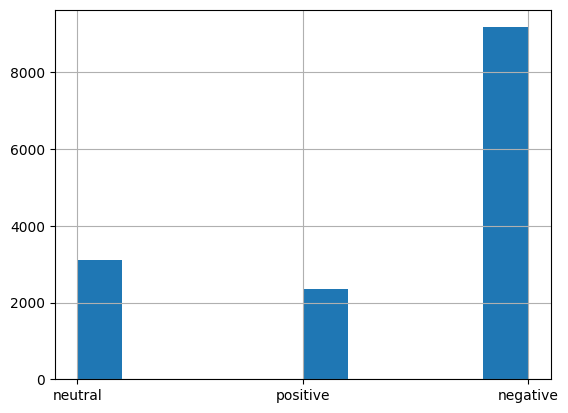

In [86]:
df['airline_sentiment'].hist()

In [87]:
target_map = {'positive': 1, 'neutral': 0, 'negative': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,0
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,0
3,negative,@VirginAmerica it's really aggressive to blast...,2
4,negative,@VirginAmerica and it's a really big bad thing...,2


In [88]:
df_train, df_test = train_test_split(df)
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,2
1989,negative,@united The engineer that designed the 787 doo...,2
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",2
1711,negative,@united ouch not fair,2
11542,negative,@USAirways stuck in cae need reFlight Booking ...,2


In [89]:
vectorize = TfidfVectorizer(max_features=2000)

In [90]:
X_train = vectorize.fit_transform(df_train['text'])
X_test = vectorize.transform(df_test['text'])

In [91]:
Y_train = df_train['target']
Y_test = df_test['target']

In [92]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print('Train', model.score(X_train, Y_train))
print('Test', model.score(X_test, Y_test))

Train 0.8551001821493625
Test 0.7978142076502732


In [93]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print('Train', roc_auc_score(Y_train, Pr_train, multi_class='ovo'))
print('Test', roc_auc_score(Y_test, Pr_test, multi_class='ovo'))

Train 0.9427155214535131
Test 0.8953675693826142


In [94]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)
print('Train', f1_score(Y_train, P_train, average='micro'))
print('Test', f1_score(Y_test, P_test, average='micro'))

Train 0.8551001821493625
Test 0.7978142076502732


In [95]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.64731183, 0.05075269, 0.30193548],
       [0.10124434, 0.69852941, 0.20022624],
       [0.0262814 , 0.00827646, 0.96544214]])

<Axes: >

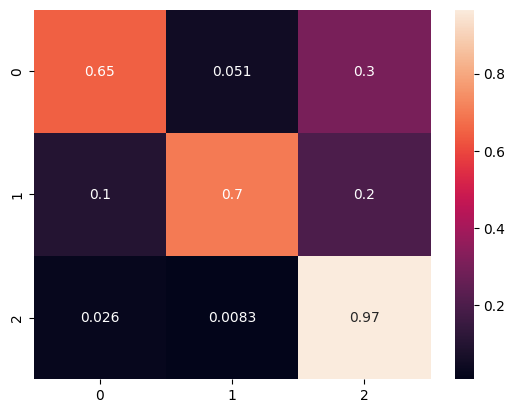

In [96]:
# show confusion matrix with seaborn
sn.heatmap(cm, annot=True)

In [97]:
def plot_cm(cm):
  classes = ['negative', 'neutral', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, cmap='Blues')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted')
  ax.set_ylabel('Actual')

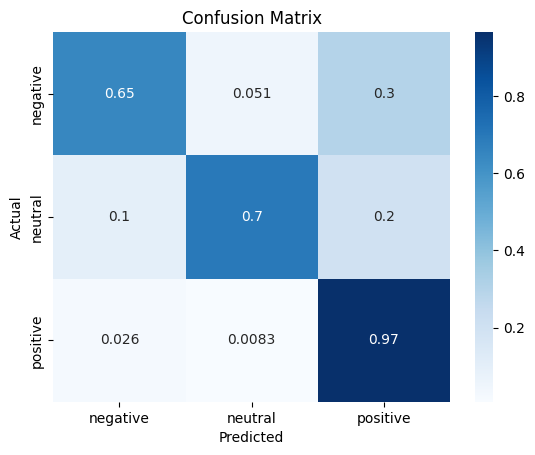

In [98]:
plot_cm(cm)

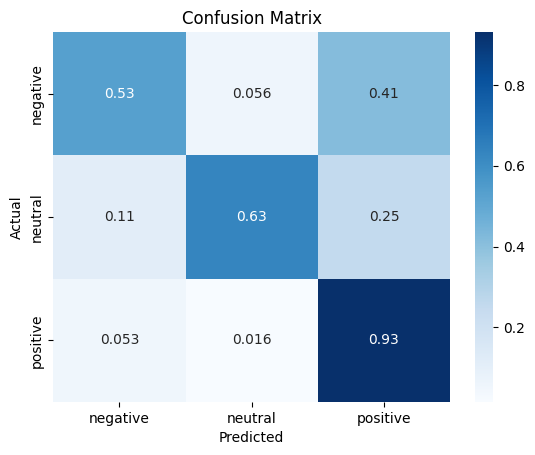

In [99]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

# Binary Labels & Model Interpretation


In [100]:
binary_target_list = [target_map['positive'], target_map['negative']]
df_b_train = df_train[df_train['target'].isin(binary_target_list)]
df_b_test = df_test[df_test['target'].isin(binary_target_list)]

In [101]:
df_b_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,2
1989,negative,@united The engineer that designed the 787 doo...,2
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",2
1711,negative,@united ouch not fair,2
11542,negative,@USAirways stuck in cae need reFlight Booking ...,2


In [102]:
X_train = vectorize.fit_transform(df_b_train['text'])
X_test = vectorize.transform(df_b_test['text'])

In [103]:
Y_train = df_b_train['target']
Y_test = df_b_test['target']

In [104]:
model = LogisticRegression()
model.fit(X_train, Y_train)
print('Train', model.score(X_train, Y_train))
print('Test', model.score(X_test, Y_test))

Train 0.9298671288272675
Test 0.9147609147609148


In [105]:
P_train = model.predict_proba(X_train)[:,1]
P_test = model.predict_proba(X_test)[:,1]
print('Train AUC', roc_auc_score(Y_train, P_train))
print('Test AUC', roc_auc_score(Y_test, P_test))

Train AUC 0.9788753747469658
Test AUC 0.9532922029571322


In [106]:
model.coef_ # check the weights

array([[ 0.24922949,  0.13419416,  0.34668122, ..., -0.50929767,
        -0.00881348,  0.60292764]])

(array([  2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   3.,   0.,
          1.,   5.,   3.,   2.,  10.,  35.,  81., 203., 502., 826., 217.,
         59.,  26.,  14.,   3.,   3.,   2.,   0.,   2.]),
 array([-8.22206025, -7.80773055, -7.39340085, -6.97907115, -6.56474145,
        -6.15041175, -5.73608205, -5.32175235, -4.90742265, -4.49309295,
        -4.07876325, -3.66443355, -3.25010385, -2.83577415, -2.42144445,
        -2.00711475, -1.59278505, -1.17845535, -0.76412565, -0.34979595,
         0.06453375,  0.47886345,  0.89319315,  1.30752285,  1.72185255,
         2.13618225,  2.55051195,  2.96484165,  3.37917135,  3.79350105,
         4.20783075]),
 <BarContainer object of 30 artists>)

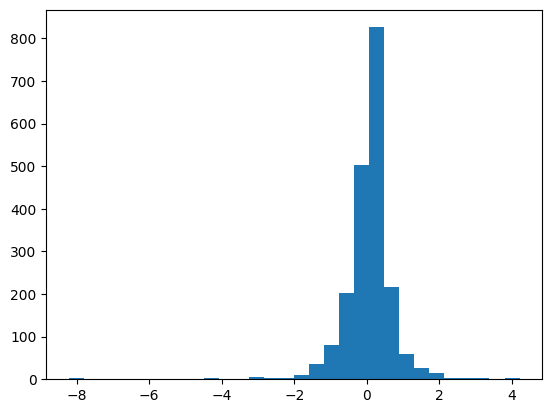

In [108]:
plt.pyplot.hist(model.coef_[0], bins=30)

In [109]:
# check the vocabulary
word_index_map = vectorize.vocabulary_
word_index_map

{'united': 1849,
 'change': 338,
 'made': 1087,
 'in': 938,
 'just': 989,
 'over': 1271,
 'hours': 903,
 'for': 745,
 'something': 1619,
 'that': 1737,
 'should': 1575,
 'have': 851,
 'taken': 1711,
 'online': 1246,
 'am': 139,
 'not': 1213,
 'loved': 1076,
 'the': 1739,
 'agent': 112,
 'though': 1755,
 'door': 568,
 'to': 1775,
 'half': 826,
 'into': 964,
 'plane': 1334,
 'seat': 1535,
 'be': 235,
 'forced': 746,
 'always': 138,
 'sit': 1591,
 'here': 873,
 'americanair': 143,
 '11': 6,
 'out': 1266,
 'of': 1227,
 'delayed': 497,
 'flights': 728,
 'you': 1993,
 'suck': 1682,
 'and': 148,
 'getting': 793,
 'worse': 1971,
 'fair': 670,
 'usairways': 1868,
 'stuck': 1677,
 'need': 1191,
 'reflight': 1438,
 'booking': 270,
 'problems': 1380,
 'next': 1199,
 'flight': 717,
 'possibly': 1359,
 'dm': 554,
 'more': 1166,
 'info': 951,
 'southwestair': 1630,
 'got': 810,
 'help': 867,
 'from': 765,
 'nice': 1201,
 'lady': 1007,
 'on': 1241,
 'phone': 1319,
 'thank': 1734,
 'refund': 1439,
 'vo

In [110]:
# lets's look at the weights for each word
# try it with different threshold values!
threshold = 2

print('Most positive words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word, weight)

Most positive words:
hours 3.1763387533926806
not 4.207830748647974
delayed 2.7198581042855854
hour 2.0605195671686256
but 2.214461066789805
cancelled 2.6628847487506375
nothing 2.111876183913802
what 2.0074049422027715
no 3.938414198906703
worst 3.2120438023533864
hold 2.7788325482920038
why 2.2143548103343513
doesn 2.0250932721961488
luggage 2.1903108180765143


In [111]:
print('Most negative words:')
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -threshold:
    print(word, weight)

Most negative words:
southwestair -2.903687418191115
thank -8.099225514793908
great -5.197515002318517
best -3.6153290961527387
virginamerica -3.2486443545541333
thx -2.8164212714726786
jetblue -2.9658013858426324
good -3.2279976339765395
thanks -8.222060250722462
love -4.38697917096466
appreciate -2.9640990730187555
awesome -4.078884206994119
cool -2.142839237084979
kudos -2.656282723530671
amazing -4.24363419270807
worries -2.741805714322401
wonderful -2.1162782091627803
